<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/Airbnb_Listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please enter the link to the Airbnb dataset: /content/listings.csv
Shape of the dataset: (7654, 16)
Null values count:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 0 to 8657
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7654 non-null   int64  
 1   na

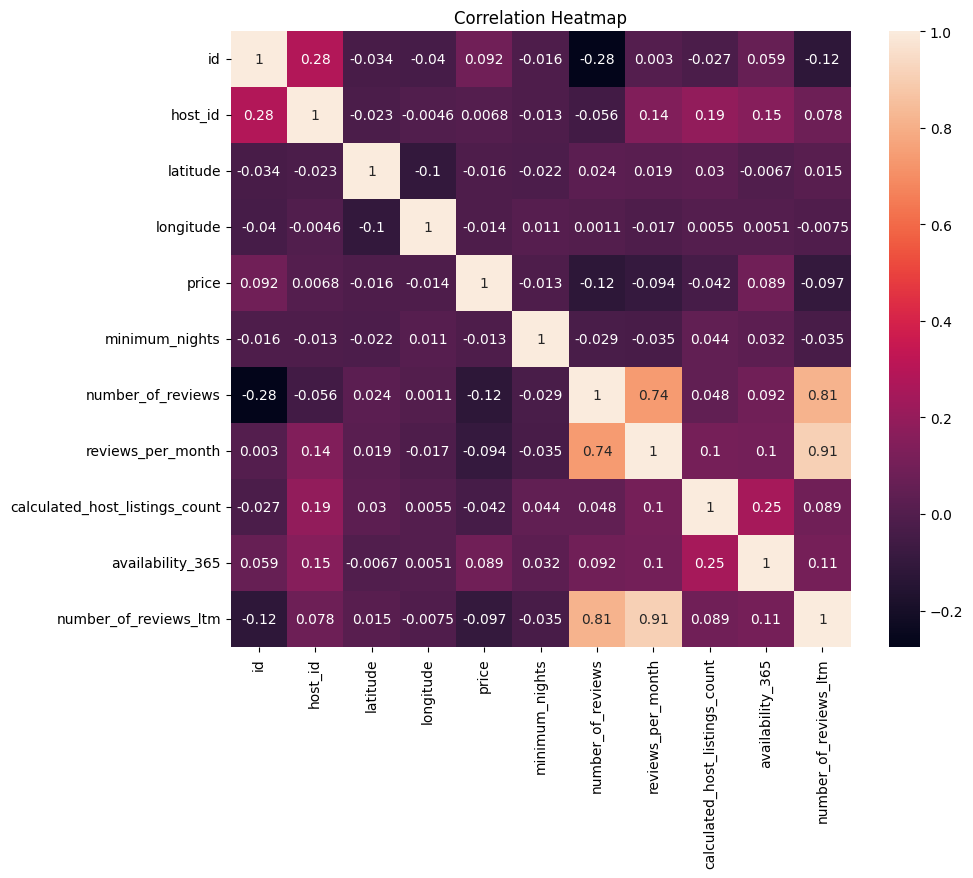

the average of the price is  239.0286124902012
the minimum price is  10.0
the maximum price is  10000.0
                  min      max        mean
room_type                                 
Entire home/apt  10.0  10000.0  265.836477
Hotel room       23.0    900.0  174.352941
Private room     30.0   9999.0  146.584360
Shared room      30.0    579.0   98.609756


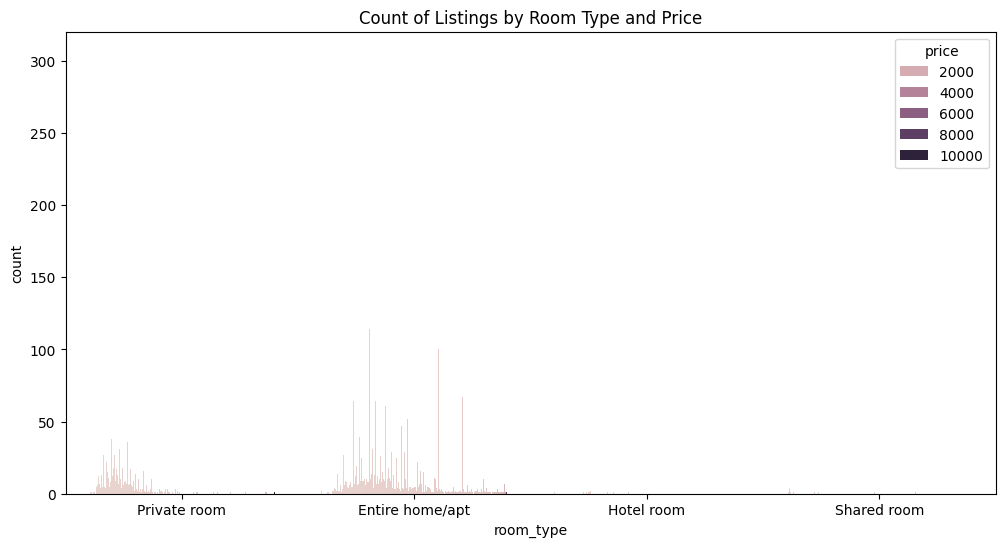

                                         min      max        mean
neighbourhood                                                    
Centrum-West                            34.0  10000.0  287.706070
Buitenveldert - Zuidas                  63.0   9999.0  308.205128
Centrum-Oost                            36.0   2430.0  272.233425
Zuid                                    23.0   1500.0  262.567780
Westerpark                              59.0   1500.0  226.569288
De Pijp - Rivierenbuurt                 36.0   1500.0  261.376564
Watergraafsmeer                         60.0   1500.0  228.575221
De Baarsjes - Oud-West                  10.0   1093.0  241.130168
Oud-Oost                                33.0    940.0  225.316348
Oud-Noord                               30.0    900.0  203.968208
Oostelijk Havengebied - Indische Buurt  40.0    800.0  199.323129
Slotervaart                             42.0    799.0  184.148387
De Aker - Nieuw Sloten                  50.0    695.0  193.827586
IJburg - Z

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ask user to input the link to the Airbnb dataset
data_url = input("Please enter the link to the Airbnb dataset: ")

# Load the dataset
df = pd.read_csv(data_url)

# Drop unnecessary columns
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# Drop rows with null values
df.dropna(inplace=True)

# Clean the 'price' column
df['price'] = df['price'].replace('[^0-9.]', '', regex=True).astype(float)

# Convert non-numeric columns to numeric if possible
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            pass  # Ignore columns that can't be converted to numeric

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("Null values count:")
print(df.isna().sum())
print(df.info())
print(df.describe())
print(df.describe(include=['object']))

# Plot correlation heatmap
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Display additional statistics about the 'price' column
print('the average of the price is ', df['price'].mean())
print('the minimum price is ', df['price'].min())
print('the maximum price is ', df['price'].max())

# Analyze the factors affecting the price
# Room type
room_type_stats = df.groupby(['room_type'])['price'].agg([np.min, np.max, np.mean])
print(room_type_stats)

# Plot count of listings by room type and price
plt.figure(figsize=(12, 6))
sns.countplot(x='room_type', hue='price', data=df)
plt.title('Count of Listings by Room Type and Price')
plt.show()

# Plot pie chart of price distribution by room type
fig = px.pie(df, values='price', names='room_type', title='Price Distribution by Room Type')
fig.show()

# Neighbourhood
neighbourhood_stats = df.groupby(['neighbourhood'])['price'].agg([np.min, np.max, np.mean]).sort_values(by='max', ascending=False)
print(neighbourhood_stats)

# Minimum nights
minimum_nights_stats = df.groupby(['minimum_nights'])['price'].agg([np.min, np.max, np.mean]).sort_values(by='max', ascending=False)
print(minimum_nights_stats)


# Availability
availability_stats = df.groupby(['availability_365'])['price'].agg([np.min, np.max, np.mean]).sort_values(by='max', ascending=False)
print(availability_stats)

